# Linear Regression Exercise

In [220]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [221]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)


X = np.hstack((np.ones_like(X), X))

In [222]:
order = np.random.permutation(len(X))
portion = 20

In [224]:

X = [X[i] for i in order]
Y = [Y[i] for i in order]

In [225]:
"""
    Split your data into train and test using the order and permutation variable
"""


train_x = np.array(X[:len(X)-20])
train_y = np.array(Y[:len(Y)-20])

test_x = np.array(X[20:])
test_y = np.array(Y[20:])

In [413]:
def get_gradient(w, x, y):
    """
        Enter code for error, mse and gradient
    """
    y_estimate = x.dot(w).flatten()
    error = y.flatten() - y_estimate
    mse = 1.0/(len(x)) * np.sum(np.square(error))
    gradient = -1.0/len(x)* np.dot(np.transpose(x),error)
#     print(error.shape,x.shape)
    return gradient, mse

In [421]:
w = np.random.randn(2)
alpha = 1e-2

"""
    Using the get_gradient function, run the Linear regression
    use iteration of 10000
"""
for i in range(10000):
    gradient, error = get_gradient(w,train_x,train_y)
    w_new = w - (alpha*gradient)
    if i% 100 == 0:
        print("Iterations: %d -Error : %f" %(i, error))
        
    w = w_new ## Change to your value

print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

Iterations: 0 -Error : 8.571069
Iterations: 100 -Error : 6.101391
Iterations: 200 -Error : 5.508747
Iterations: 300 -Error : 5.092411
Iterations: 400 -Error : 4.726604
Iterations: 500 -Error : 4.398494
Iterations: 600 -Error : 4.103706
Iterations: 700 -Error : 3.838822
Iterations: 800 -Error : 3.600804
Iterations: 900 -Error : 3.386929
Iterations: 1000 -Error : 3.194747
Iterations: 1100 -Error : 3.022058
Iterations: 1200 -Error : 2.866885
Iterations: 1300 -Error : 2.727451
Iterations: 1400 -Error : 2.602159
Iterations: 1500 -Error : 2.489576
Iterations: 1600 -Error : 2.388412
Iterations: 1700 -Error : 2.297509
Iterations: 1800 -Error : 2.215827
Iterations: 1900 -Error : 2.142429
Iterations: 2000 -Error : 2.076476
Iterations: 2100 -Error : 2.017213
Iterations: 2200 -Error : 1.963961
Iterations: 2300 -Error : 1.916110
Iterations: 2400 -Error : 1.873112
Iterations: 2500 -Error : 1.834476
Iterations: 2600 -Error : 1.799759
Iterations: 2700 -Error : 1.768563
Iterations: 2800 -Error : 1.7405

In [419]:
X = np.array(X)
Y = np.array(Y)


Plotting the Model we obtained

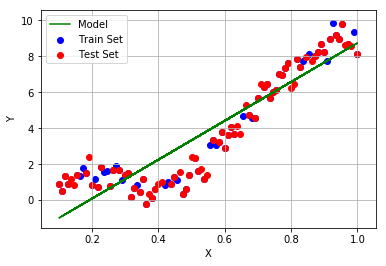

In [420]:
plt.plot(X[:,1], X.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Generate contour plot of the cost function

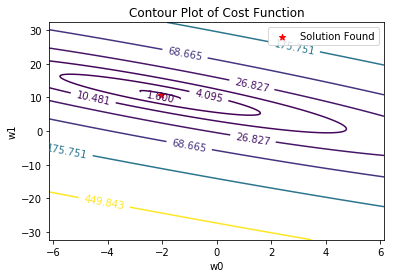

In [422]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

Extra Exercises.

Describe what you see in the both diagrams you have.

1. for a stright line model it has a good approximation
2. second picture shows even though we were abel to reduce error we are far from the best solution